<a href="https://colab.research.google.com/github/MoizAhmed2517/Classification_projects/blob/main/Mushroom_Types_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Is Mushroom Poisonour or edible?

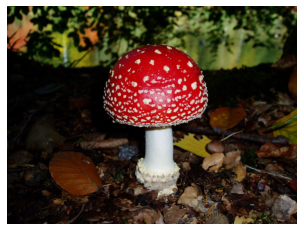

In [11]:
import matplotlib.pyplot as plt
im = plt.imread("mushroom.jpg")
plt.imshow(im)
plt.axis(False)
plt.show()

## Data Source
Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [5]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [27]:
for n in range(len(df.columns)):
  print(f"The distribution of {df.columns[n]} is below:")
  print(f"{df[df.columns[n]].value_counts()}")

The distribution of class is below:
e    4208
p    3916
Name: class, dtype: int64
The distribution of cap-shape is below:
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
The distribution of cap-surface is below:
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
The distribution of cap-color is below:
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
The distribution of bruises is below:
f    4748
t    3376
Name: bruises, dtype: int64
The distribution of odor is below:
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
The distribution of gill-attachment is below:
f    7914
a     210
Name: gill-attachment, dtype: int64
The distribution of gill-spacing is below:
c    6812
w    1312
Name: gill-spacing, dtype: int64
The distribution of gill-size is below:
b    5612
n    2512
Name: gill

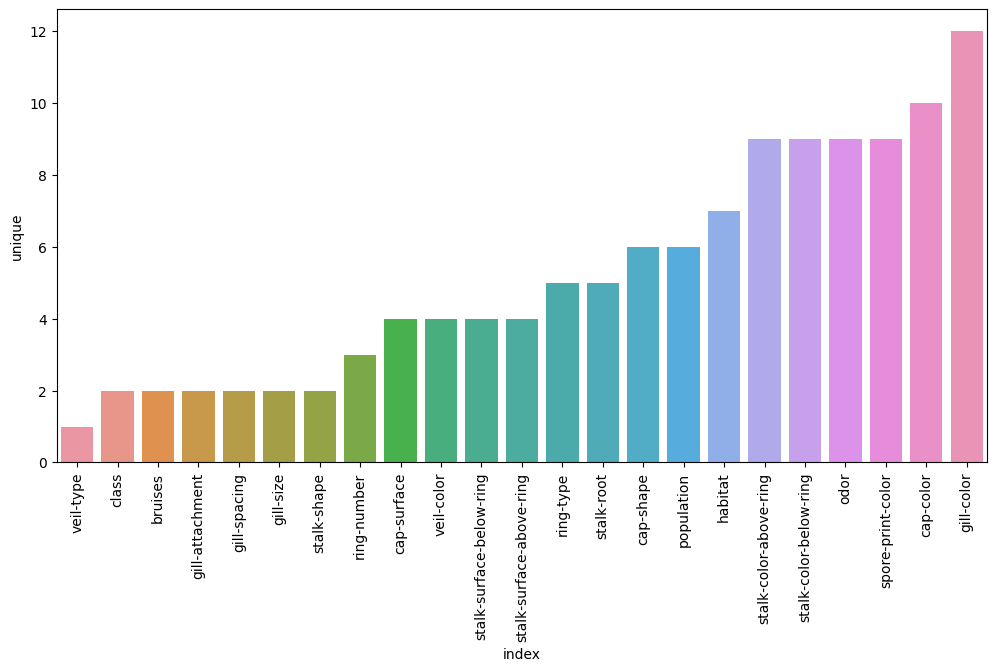

In [43]:
plt.figure(figsize=(12,6), dpi=100)
feat_uni = df.describe().transpose().reset_index().sort_values('unique')
sns.barplot(data=feat_uni, x='index', y='unique')
plt.xticks(rotation=90);
plt.show()

In [45]:
X = df.drop('class', axis=1)
y = df['class']
X = pd.get_dummies(X, drop_first=True)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.15)

In [51]:
Adaboost_model_1 = AdaBoostClassifier(n_estimators=1)
Adaboost_model_1.fit(X_train, y_train)
y_pred = Adaboost_model_1.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



<Figure size 1200x1200 with 0 Axes>

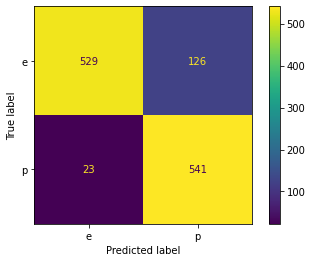

In [62]:
cm = confusion_matrix(y_test, y_pred, labels=Adaboost_model_1.classes_)
plt.figure(figsize=(12, 12), dpi=100)
disp = ConfusionMatrixDisplay(cm, display_labels=Adaboost_model_1.classes_)
disp.plot()
plt.show()

In [63]:
Adaboost_model_1.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [65]:
X.columns[Adaboost_model_1.feature_importances_.argmax()]

'odor_n'

Our Algorithm has taken important feature as odor_n which means we can classify on the basis of odor if it has or not.

Using currenly [stump](https://link.springer.com/referenceworkentry/10.1007/978-0-387-30164-8_202) (Decision Tree Classifier splitting only on 1 feature)

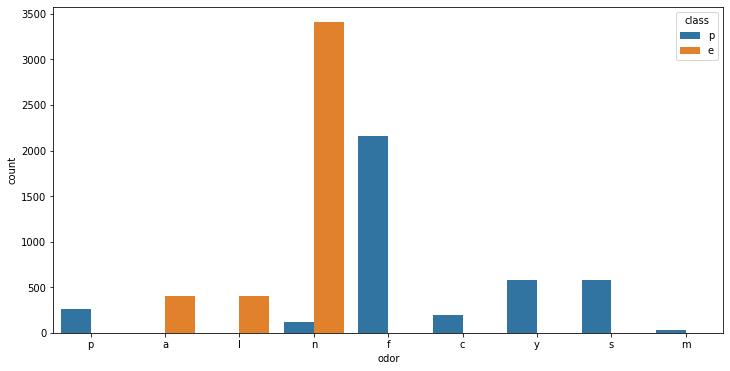

In [68]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='odor', hue='class')
plt.show()

From dataset it very obvious now if you have to classify mushroom on the basis of only one feature check its odor. Most likely mushroom is odor.

In [74]:
error_rates = []
for n in range(1, 96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    error = 1 - accuracy_score(y_test, preds)
    error_rates.append(error)

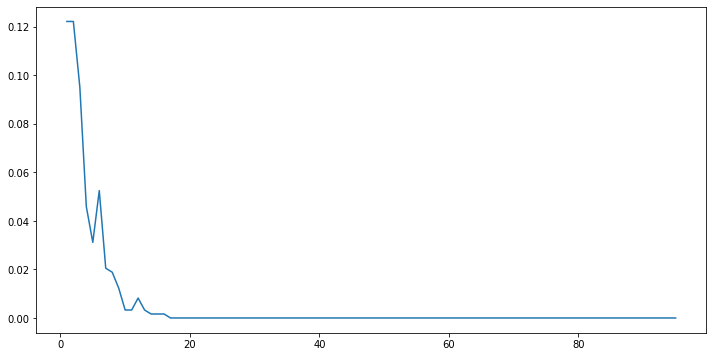

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 96), error_rates)

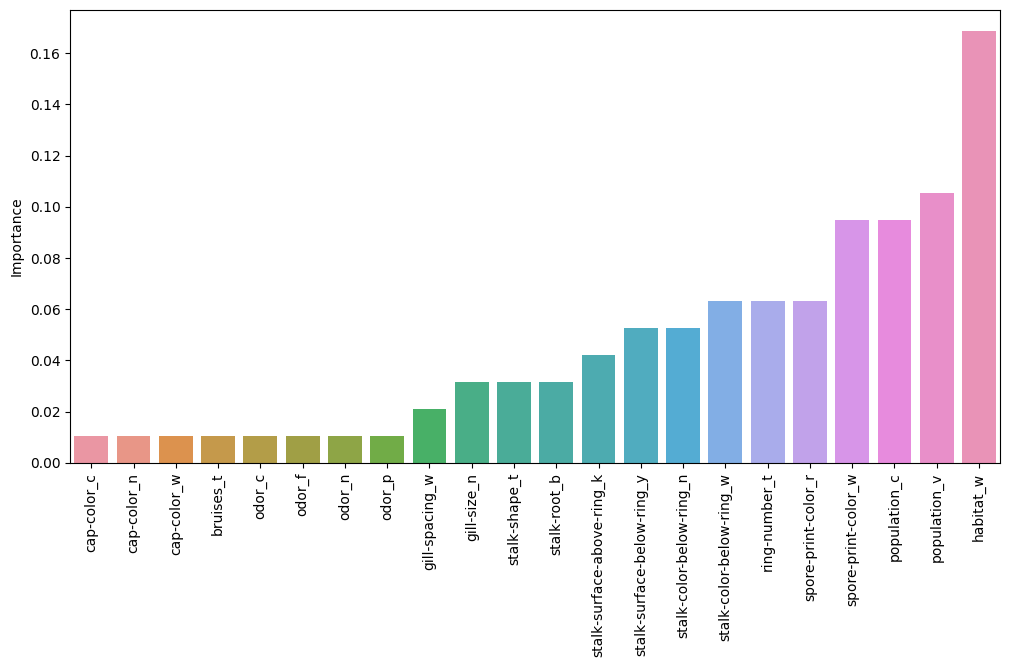

In [79]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Importance'])
imp_feats = feats[feats['Importance']>0]
plt.figure(figsize=(12, 6), dpi=100)
sns.barplot(data=imp_feats.sort_values('Importance'), x=imp_feats.index, y='Importance')
plt.xticks(rotation=90)
plt.show()

In [80]:
model_2 = AdaBoostClassifier(n_estimators=18)
model_2.fit(X_train, y_train)
y_preds = model_2.predict(X_test)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



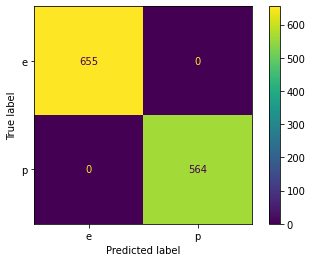

In [85]:
cm = confusion_matrix(y_test, y_preds, labels=model_2.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=model_2.classes_)
disp.plot()
plt.show()

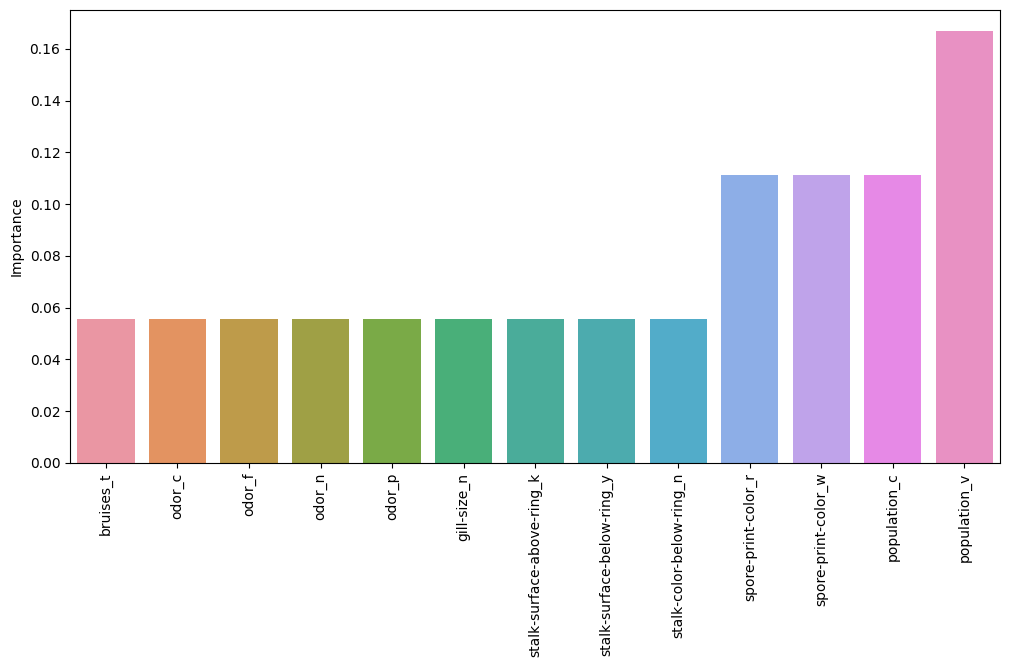

In [82]:
mode_2_feats = pd.DataFrame(index=X.columns, data=model_2.feature_importances_, columns=['Importance'])
imp_feats_mod2 = mode_2_feats[mode_2_feats['Importance']>0]
plt.figure(figsize=(12, 6), dpi=100)
sns.barplot(data=imp_feats_mod2.sort_values('Importance'), x=imp_feats_mod2.index, y='Importance')
plt.xticks(rotation=90)
plt.show()

Above our most important feature to classify that either mushroom is **Posinous** or **Edible**